In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import warnings

#ignore by message
warnings.filterwarnings("ignore")

# Creando AlexNet

In [2]:
np.random.seed(1000)

#Declaración
AlexNet = Sequential()

#Todos los valores corresponden a la Arquitectura Interna de como trabaja AlexNet

#Capa Convolucional 1
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Capa Convolucional 2
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Capa Convolucional 3
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#Capa Convolucional 4
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#Capa Convolucional 5
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Se convierte a una capa completamente conectada
AlexNet.add(Flatten())

# Capa completamente conectada 1
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Dropout (evita el Overfitting)
AlexNet.add(Dropout(0.4))

# Capa completamente conectada 2
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

# Capa completamente conectada 3
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Capa de salida
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [3]:
#Compilamos el modelo
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

# Usamos el dataset Cifar 10

In [4]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Realizamos el train_test_split 
#20% para Test y 80% para entrenamiento
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Vemos las dimensiones del dataset
print("Dimensiones de entrenamiento: ",(x_train.shape,y_train.shape))
print("Dimensiones de validación: ",(x_val.shape,y_val.shape))
print("Dimensiones de testeo: ",(x_test.shape,y_test.shape))


170508288/170498071 [==============================] - 11s 0us/step
Dimensiones de entrenamiento:  ((35000, 32, 32, 3), (35000, 1))
Dimensiones de validación:  ((15000, 32, 32, 3), (15000, 1))
Dimensiones de testeo:  ((10000, 32, 32, 3), (10000, 1))


## Aplicamos el One Hot Enconding

In [5]:
#Aplicamos el One Hot Enconding para las variables (y_train, y_val y y_test) ya que el dataset contiene 10 outputs distintos
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Volvemos a verificar las dimensiones del dataset
print("Dimensiones de entrenamiento: ",(x_train.shape,y_train.shape))
print("Dimensiones de validación: ",(x_val.shape,y_val.shape))
print("Dimensiones de testeo: ",(x_test.shape,y_test.shape))

Dimensiones de entrenamiento:  ((35000, 32, 32, 3), (35000, 10))
Dimensiones de validación:  ((15000, 32, 32, 3), (15000, 10))
Dimensiones de testeo:  ((10000, 32, 32, 3), (10000, 10))


## Se aplica Image Data Augmentation

In [6]:
#Con Image Data Generator se generan imagenes alteradas del dataset para mejorar su precisión
#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )
val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)
test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [7]:
#Anulador de Learning Rate
#Esta función disminuirá el Learning Rate cuando el modelo deje de mostrar mejoras
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01, patience=3, min_lr=1e-5) 

# Entrenando el modelo

In [23]:
#Parámetros
batch_size= 75 #100
epochs=2 #100
learn_rate=.001 #.001

In [24]:
AlexNet.fit(train_generator.flow(x_train, y_train, batch_size=batch_size), 
                      epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, 
                      validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), 
                      validation_steps = x_test.shape[0]//batch_size, callbacks = [lrr], verbose=1)

Epoch 1/2
466/466 [==============================] - 648s 1s/step - loss: 1.3805 - accuracy: 0.5104 - val_loss: 1.7453 - val_accuracy: 0.4202 - lr: 0.0010
Epoch 2/2
466/466 [==============================] - 648s 1s/step - loss: 1.2361 - accuracy: 0.5690 - val_loss: 1.3659 - val_accuracy: 0.5240 - lr: 0.0010


In [25]:
AlexNet.save("C:/Users/User/Desktop/Juan/Machine/alexnet.h5")
print(AlexNet.history.history.keys())
#AlexNet=keras.models.load_model('D:/1_UPC/Ciclo (8)/Machine Learning/alexnet.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


# Gráfico de rendimiento

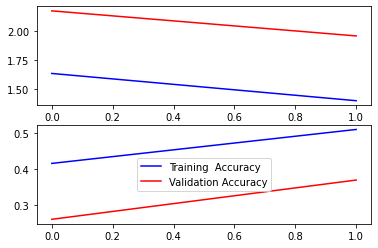

In [11]:
import matplotlib.pyplot as plt

#Plotting the training and validation loss
f,ax=plt.subplots(2,1)


#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(AlexNet.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(AlexNet.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(AlexNet.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(AlexNet.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

## Función para la matriz de confusión

In [12]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Matriz de Confusión
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
 
    #Imprimiendo la Matriz de Confusión
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [13]:
#Usando AlexNet para y_pred y y_true
y_pred=np.argmax(AlexNet.predict(x_test), axis=-1)
y_true=np.argmax(y_test,axis=1)

#Imprimiendo la matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_mtx=confusion_matrix(y_true,y_pred)
confusion_mtx

array([[191, 169, 333,   0,   0,  10,   0,   4, 255,  38],
       [  2, 918,  16,   0,   0,  16,   0,   0,  34,  14],
       [  9,  70, 782,   0,   0,  82,   0,  12,  26,  19],
       [  1, 116, 436,   0,   0, 375,   0,   9,  24,  39],
       [ 13,  85, 632,   0,   0, 132,   0,  89,  23,  26],
       [  2,  44, 441,   0,   0, 464,   0,  13,  20,  16],
       [  1, 206, 472,   4,   0, 222,   5,  15,  20,  55],
       [  2,  59, 197,   0,   0, 299,   0, 360,   9,  74],
       [ 28, 186,  68,   0,   0,  14,   0,   2, 676,  26],
       [  1, 617,  36,   0,   0,  24,   0,  11,  60, 251]])

### Matriz de confusión

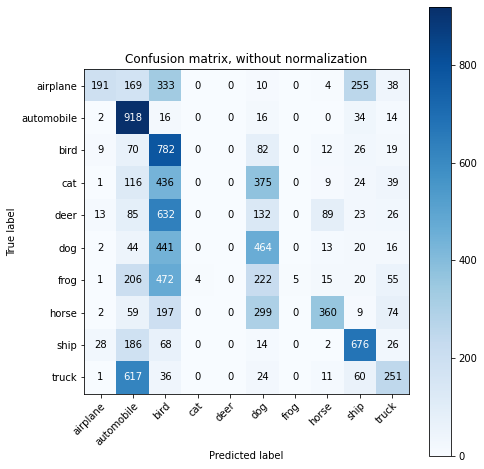

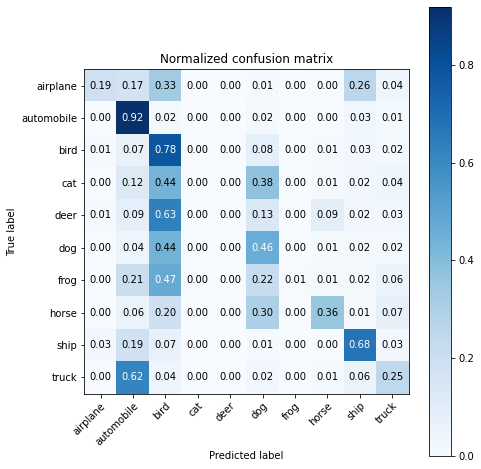

In [14]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')

# Mostrando Accuracy del modelo

In [15]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.3647


# Curva ROC y AUC del modelo

In [16]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Sacamos la curva ROC por cada par de variables
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

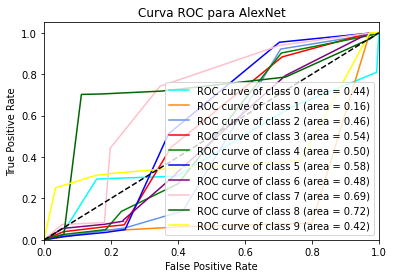

In [17]:
colors = ["aqua", "darkorange", "cornflowerblue","red","green","blue","purple","pink","darkgreen","yellow"]
for i, color in zip(range(10), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
plt.rcParams["figure.figsize"] = (20,10)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC para AlexNet")
plt.legend(loc="lower right")
plt.show()
